In [21]:
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

Criando um modelo com várias entradas

In [41]:
# Modelo que depende só de uma variável
taiwan_real_estate = pd.read_csv('./taiwan_real_estate2.csv')
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()
mdl_price_vs_age.params


house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64

In [23]:
# Modelo que depende de duas variáveis
mdl_price_vs_both = ols("price_twd_msq ~ n_convenience + house_age_years + 0", data = taiwan_real_estate).fit()

mdl_price_vs_both.params

house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64

Os coeficientes house_age_years[] descrevem variáveis categoricas e quanto elas aumentam no preço de uma casa (em paralelo ao n_convenience)

<Axes: xlabel='n_convenience', ylabel='price_twd_msq'>

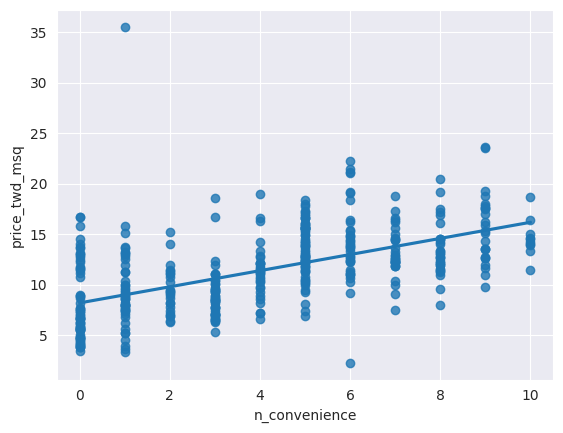

In [24]:
sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)

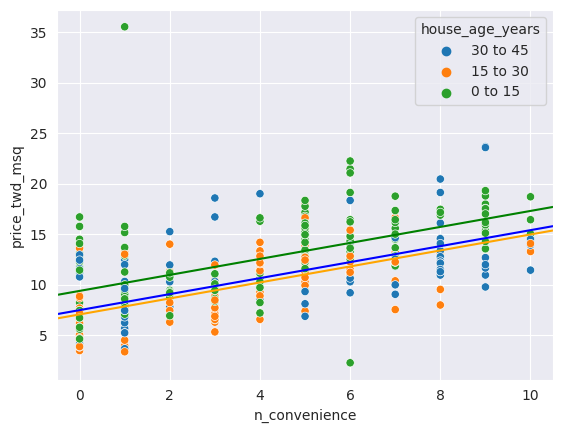

In [25]:
## Nesse grafico combinamos as informações dos anteriores
# cada ponto esta pintado da cor que representa a idade da casa
sns.scatterplot(data=taiwan_real_estate, x="n_convenience", y="price_twd_msq", hue="house_age_years")

coeffs = mdl_price_vs_both.params
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

# As linhas são os gráficos levando em conta os intercepts gerados para cada grupo de idades de casa
plt.axline(xy1=(0, ic_0_15), slope=slope, color="green")
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
plt.axline(xy1=(0, ic_30_45), slope=slope, color="blue")

plt.show()

In [26]:
house_age_years = taiwan_real_estate["house_age_years"].unique()

data = product(house_age_years, np.arange(0, 11))
df = pd.DataFrame(data = data, columns=["house_age_years", "n_convenience"])
#usando o modelo acima pra prever precos
prediction_df = df.assign(price_twd_msq =  mdl_price_vs_both.predict(df))

In [27]:
prediction_df

,house_age_years,n_convenience,price_twd_msq
0,30 to 45,0,7.510958
1,30 to 45,1,8.302415
2,30 to 45,2,9.093873
3,30 to 45,3,9.885330
4,30 to 45,4,10.676787
5,30 to 45,5,11.468244
6,30 to 45,6,12.259701
7,30 to 45,7,13.051158
8,30 to 45,8,13.842615
9,30 to 45,9,14.634072


Vamos fazer um grafico parecido com o de cima, so que adicionando pontos em preto que são da predição real dos dados com nosso modelo

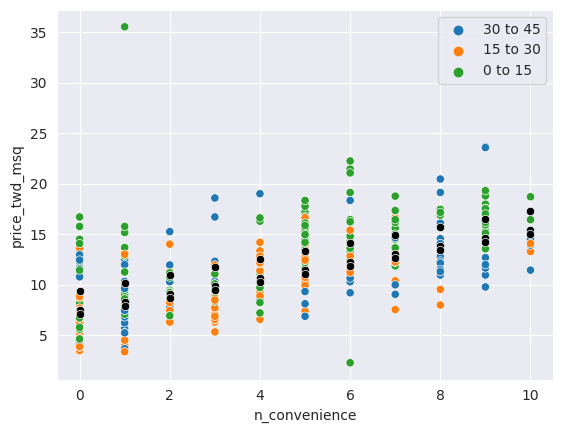

In [28]:
# plt.axline(xy1=(0, ic_0_15), slope=slope, color="green")
# plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
# plt.axline(xy1=(0, ic_30_45), slope=slope, color="blue")
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                data=taiwan_real_estate)
mdl_price_vs_both.predict(df)

sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                color="black",
                data=prediction_df)
plt.show()

Podemos também ao inves de usar o modelo, extrair os dados na mão e montar e equação

In [29]:
conditions = [
	df["house_age_years"] == "0 to 15",
	df["house_age_years"] == "15 to 30",
	df["house_age_years"] == "30 to 45"
]

# Define choices
choices = [ic_0_15, ic_15_30, ic_30_45]

# Escolhe o intercept pra cada categoria
intercept = np.select(conditions, choices)

prediction_df = prediction_df.assign(intercept = intercept, price_twd_msq = intercept + slope * prediction_df["n_convenience"])

In [30]:
prediction_df

,house_age_years,n_convenience,price_twd_msq,intercept
0,30 to 45,0,7.510958,7.510958
1,30 to 45,1,8.302415,7.510958
2,30 to 45,2,9.093873,7.510958
3,30 to 45,3,9.885330,7.510958
4,30 to 45,4,10.676787,7.510958
5,30 to 45,5,11.468244,7.510958
6,30 to 45,6,12.259701,7.510958
7,30 to 45,7,13.051158,7.510958
8,30 to 45,8,13.842615,7.510958
9,30 to 45,9,14.634072,7.510958


## Coeficientes de erro

In [31]:
# coeficiente de erro RSE do modelo que usa duas variáveis de independentes
np.sqrt(mdl_price_vs_both.mse_resid)

3.213460280552323

In [32]:
# coeficiente de erro RSE do modelo que usa uma variavel independente
np.sqrt(mdl_price_vs_age.mse_resid)

3.950183875630859

In [33]:
# rsquared
mdl_price_vs_age.rsquared_adj

0.07936923279276686

In [34]:
# rsquared
mdl_price_vs_both.rsquared_adj

0.3907483227109875

# Modelos para cada categoria

Ao inves de usar um modelo que leva em conta todas as categorias de dados que temos, podemos separar os nossos dados e treinar modelos especificos pra cada
categoria

In [35]:
taiwan_0_to_15 = taiwan_real_estate[taiwan_real_estate["house_age_years"] == "0 to 15"]
taiwan_15_to_30 = taiwan_real_estate[taiwan_real_estate["house_age_years"] == "15 to 30"]
taiwan_30_to_45 = taiwan_real_estate[taiwan_real_estate["house_age_years"] == "30 to 45"]

mdl_0_to_15 = ols("price_twd_msq ~ n_convenience", data = taiwan_0_to_15).fit()
mdl_15_to_30 = ols("price_twd_msq ~ n_convenience", data = taiwan_15_to_30).fit()
mdl_30_to_45 = ols("price_twd_msq ~ n_convenience", data = taiwan_30_to_45).fit()

# Print the coefficients
print(mdl_0_to_15.params)
print(mdl_15_to_30.params)
print(mdl_30_to_45.params)

Intercept        9.241702
n_convenience    0.833587
dtype: float64
Intercept        6.871919
n_convenience    0.851917
dtype: float64
Intercept        8.113123
n_convenience    0.668698
dtype: float64


In [36]:
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})
prediction_data_0_to_15 = explanatory_data.assign(price_twd_msq =mdl_0_to_15.predict(explanatory_data), house_age_years = "0 to 15")
prediction_data_15_to_30 = explanatory_data.assign(price_twd_msq =mdl_15_to_30.predict(explanatory_data), house_age_years = "15 to 30")
prediction_data_30_to_45 = explanatory_data.assign(price_twd_msq =mdl_30_to_45.predict(explanatory_data), house_age_years = "30 to 45")

prediction_data = pd.concat([prediction_data_0_to_15, prediction_data_15_to_30, prediction_data_30_to_45])

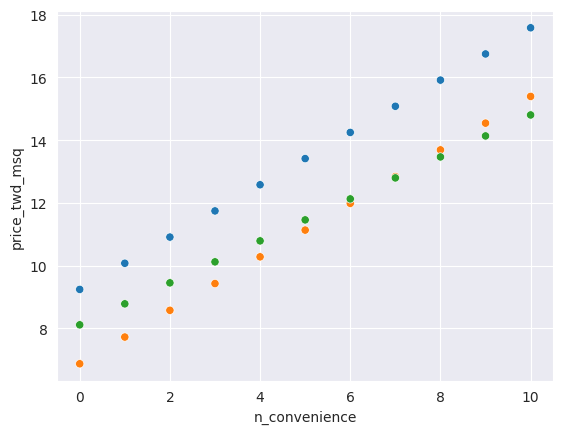

In [37]:
# Plotando um gráfico que mostra todos os preços de casa por numero de conveniencia agrupando eles pela idade das casas
# sns.lmplot(x='n_convenience',
#      y='price_twd_msq',
#      data=taiwan_real_estate,
#      hue='house_age_years',
#      ci=None,
#      legend_out=False)


sns.scatterplot(
     data = prediction_data,
     x="n_convenience",
     y="price_twd_msq",
    hue="house_age_years",
     legend=False)
plt.show()

# Modelos que levam em conta iteraçẽos entre dois parâmetros

Sabemos que, lógicamente, o preço da casa depende do numero de conveniencias ao redor dela E da idade da casa.
Por exemplo, uma casa de 10 anos tende a ter um preço menor que uma casa de 20 anos, por isso não podemos colocar tudo no mesmo bolo

Foi isso que fizemos na última parte.
Mas podemos fazer melhor! Podemos criar um modelo que dado um parâmetro numérico e um categorico, consiga automaticamente saber que aquele parâmetro
numérico depende do parâmetro categorico (sem apenas juntar os dois em todas as categorias)

In [38]:

mdl_price_vs_both_inter = ols("price_twd_msq ~ n_convenience + house_age_years + n_convenience:house_age_years", data = taiwan_real_estate).fit()
# Modelo sem o n_convenience para vermos melhor os coeficientes
mdl_price_vs_both_no_int = ols("price_twd_msq ~ house_age_years + n_convenience:house_age_years + 0", data = taiwan_real_estate).fit()

In [39]:
mdl_price_vs_both_no_int.params

house_age_years[0 to 15]                   9.241702
house_age_years[15 to 30]                  6.871919
house_age_years[30 to 45]                  8.113123
n_convenience:house_age_years[0 to 15]     0.833587
n_convenience:house_age_years[15 to 30]    0.851917
n_convenience:house_age_years[30 to 45]    0.668698
dtype: float64

Podemos ver que, naturalmente, os preços crescem mais rápido para casas novas

Podemos fazer esse modelo "na mão"

In [60]:
n_convenience = np.arange(0, 11)
house_age_years = taiwan_real_estate["house_age_years"].unique()
p = product(n_convenience, house_age_years)
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "house_age_years"])

coeffs = mdl_price_vs_both_inter.params

ic_0_15, ic_15_30, ic_30_45, slope_0_15, slope_15_30, slope_30_45 = coeffs

conditions = [
    explanatory_data["house_age_years"] == "0 to 15",
    explanatory_data["house_age_years"] == "15 to 30",
    explanatory_data["house_age_years"] == "30 to 45"
]

intercept_choices = [ic_0_15, ic_15_30, ic_30_45]
slope_choices = [slope_0_15, slope_15_30, slope_30_45]


intercept = np.select(conditions, intercept_choices)
slope = np.select(conditions, slope_choices)

prediction_data = explanatory_data.assign(
    # y = a + bx
    price_twd_msq = intercept + slope * explanatory_data["n_convenience"]
)

In [62]:
prediction_data

,n_convenience,house_age_years,price_twd_msq
0,0,30 to 45,-1.128579
1,0,15 to 30,-2.369784
2,0,0 to 15,9.241702
3,1,30 to 45,-1.293467
4,1,15 to 30,-2.351453
5,1,0 to 15,10.075289
6,2,30 to 45,-1.458356
7,2,15 to 30,-2.333122
8,2,0 to 15,10.908876
9,3,30 to 45,-1.623244


# Simpson paradox

As vezes sera necessario separar as slopes do nosso modelo por alguma variável categorica, para termos modelos mais preciso dada cada caractersitica.

Você precisa articular uma pergunta antes de modelar seu modelo